### Final Term Project

## Human Activity Recognition Using Smartphones


This project trying to build a model can predict the Activity of a user whether a person is (Laying, Standing , Sitting, Walking, Walking_upstairs, or Walking_downstairs) on the waist.. 

The information in this dataset is the measurements from wearable sensors ((accelerometer, gyroscope, magnetometer, and GPS)) of the smartphone. The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years.  
 

##### The Plan is

1. Read Dataset

2. Dataset Cleaning

3. Data Preprocessing

4. Models

   a. Logistic Regression
   
   b. Support Vector Machine
   
   c. K-Nearest Neighbor
   
   d. Random Forest 
   
5- Calculate accuracy.


In [63]:
# Load the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [64]:
#Load Dataset
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


In [65]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [66]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

###### Dataset Cleaning
1 Outliers   
2 Filling null values  
3 Check for data imbalance  

In [67]:
#Handling outliers:
train.describe()
#There is no any possibility of having Outliers. All the values are squeezed between -1 to 1.

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [68]:
#Checking for missing  NaN/null values 
print("Total Null values in Train: {}\n".format(train.isnull().values.sum()))
print("Total Null values in Test: {} \n".format(test.isnull().values.sum()))

Total Null values in Train: 0

Total Null values in Test: 0 



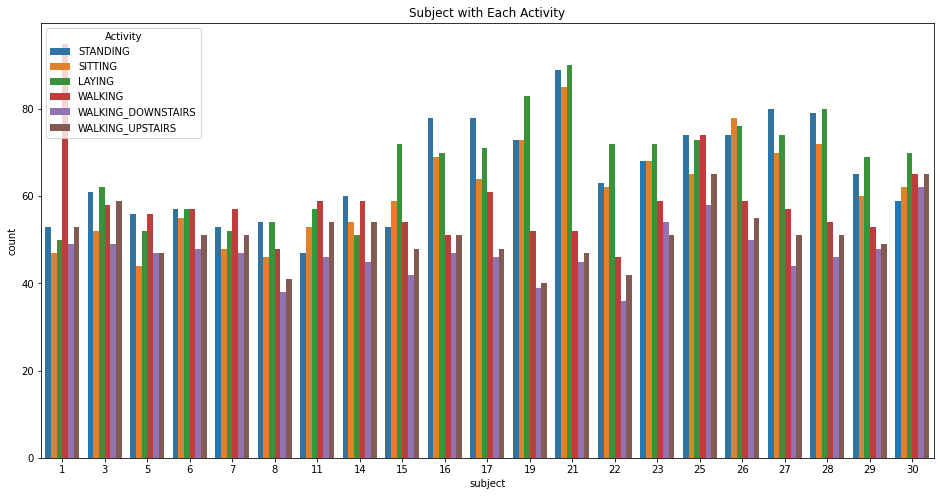

In [69]:
#Check for imbalanced dataset
plt.figure(figsize = (16,8))
plt.title("Subject with Each Activity")
sns.countplot(hue = 'Activity', x='subject',data = train);
plt.show()

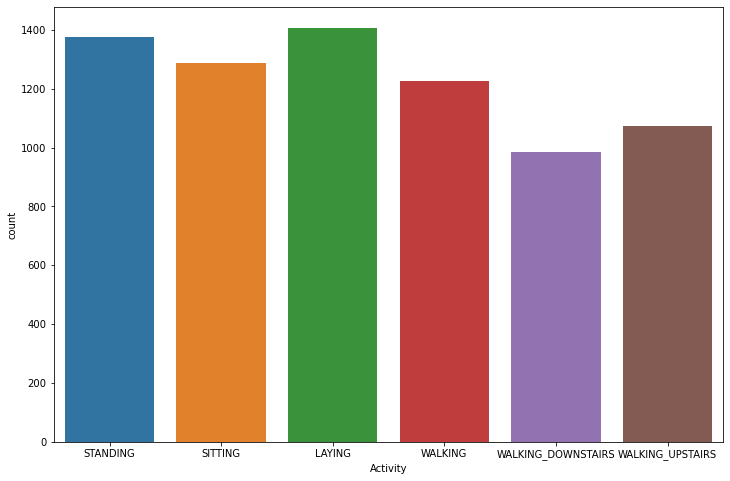

In [70]:
# There is no any huge amount of gap between them. 
plt.figure(figsize = (12,8))
sns.countplot(x = 'Activity', data = train);

 Correcting feature names by remove ()

In [71]:
# Removing ()
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')
train.columns = columns
test.columns = columns

In [72]:
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

### Data Preprocessing
Splitting training and testing

In [73]:
X_train = train.drop(["subject","Activity"], axis = 1)
y_train = train.Activity


X = test.drop(["subject","Activity"], axis = 1)
y = test.Activity

print('Training data size:', X.shape)
print('Test data size:', X.shape)

Training data size: (2947, 561)
Test data size: (2947, 561)


In [74]:
model_score = pd.DataFrame(columns = ("Model","Score"))


### Models and Cross Validations
Logistic Regression
SVM
Random Forest
KNN

In [75]:
# 1- Logistic regression model:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.cm as cm


In [76]:
# K-FOLD= 10
kfold = model_selection.KFold(n_splits=10, random_state=42)
kfold
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [77]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
#probs_y=logmodel.predict_proba(X_test) 
accuracy_scores1 = accuracy_score(y_test, predictions)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores1))


Logistic Regression accuracy: 98.87005649717514%


In [78]:
from sklearn.metrics import confusion_matrix  
y_pred=logmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
cm

array([[170,   0,   0,   0,   0,   0],
       [  0, 148,   4,   0,   0,   0],
       [  0,   4, 133,   0,   0,   0],
       [  0,   0,   0, 154,   0,   0],
       [  0,   0,   0,   1, 121,   1],
       [  0,   0,   0,   0,   0, 149]], dtype=int64)

In [79]:
model_score = model_score.append(pd.DataFrame({'Model':["logistic regression"],'Score':[accuracy_scores1]}))

The performance of each human daily activity was measured in terms of precision, recall and F-measure

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       170
           SITTING       0.97      0.97      0.97       152
          STANDING       0.97      0.97      0.97       137
           WALKING       0.99      1.00      1.00       154
WALKING_DOWNSTAIRS       1.00      0.98      0.99       123
  WALKING_UPSTAIRS       0.99      1.00      1.00       149

          accuracy                           0.99       885
         macro avg       0.99      0.99      0.99       885
      weighted avg       0.99      0.99      0.99       885



In [81]:
# 2- Support Vector Classifier
from sklearn.svm import SVC
clf2 = SVC().fit(X_train, y_train)
prediction = clf2.predict(X_test)
accuracy_scores2 = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores2))

Support Vector Classifier accuracy: 97.6271186440678%


In [82]:
from sklearn.metrics import confusion_matrix  
y_pred=clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
cm

array([[170,   0,   0,   0,   0,   0],
       [  0, 148,   4,   0,   0,   0],
       [  0,  11, 126,   0,   0,   0],
       [  0,   0,   0, 153,   0,   1],
       [  0,   0,   0,   1, 118,   4],
       [  0,   0,   0,   0,   0, 149]], dtype=int64)

In [83]:
model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[accuracy_scores2]}))

In [84]:
# 3- Random Forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores3 = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores3))

Random Forest Classifier accuracy: 97.40112994350282%


In [85]:
model_score = model_score.append(pd.DataFrame({'Model':["RandomForest"],'Score':[accuracy_scores3]}))

In [86]:
# 4- K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
prediction = knn.predict(X_test)
accuracy_scores4 = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores4))

K Nearest Neighbors Classifier accuracy: 96.045197740113%


In [87]:
from sklearn.metrics import confusion_matrix  
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
cm

array([[170,   0,   0,   0,   0,   0],
       [  0, 139,  12,   0,   0,   1],
       [  0,  19, 118,   0,   0,   0],
       [  0,   0,   0, 154,   0,   0],
       [  0,   0,   0,   3, 120,   0],
       [  0,   0,   0,   0,   0, 149]], dtype=int64)

In [88]:
model_score = model_score.append(pd.DataFrame({'Model':["KNN"],'Score':[accuracy_scores4]}))

Also measured based on the comparison of overall accuracy rate between different classifiers

#### Compare accuray between models

In [89]:
model_score.head()

,Model,Score
0,logistic regression,98.870056
0,LinearSVM,97.627119
0,RandomForest,97.401130
0,KNN,96.045198


After applied different machine learning algorithms; found that Logistic Regression performed the best in classifying different activities.

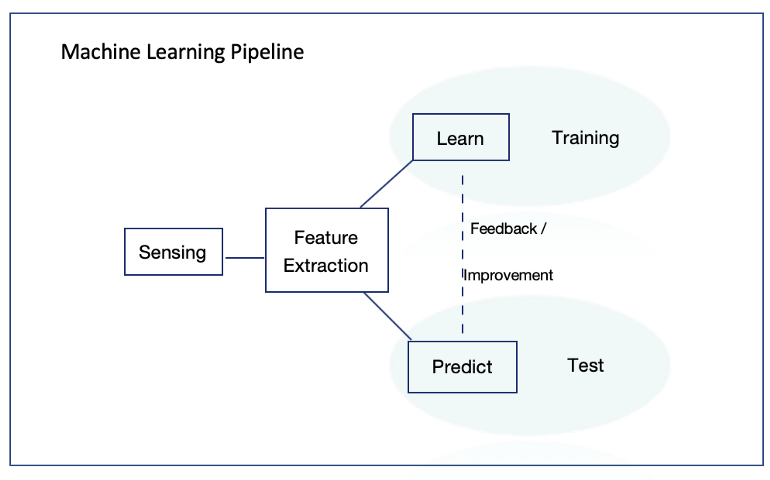